# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fachrul Rozi]
- **Email:** [fchrlrzii23@gmail.com]
- **ID Dicoding:** [MC130D5Y0921]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Apakah ada perbedaan jumlah penyewaan sepeda pada hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk membuat visualisasi lebih menarik
from google.colab import drive
import gdown
import zipfile
import os

## Data Wrangling

### Gathering Data

In [16]:
# Gathering Data

# URL ID dari file yang dibagikan
file_id = "16w4Z3Wy6hlVU6RHLu2BxdpqD4QXwU_8d"
download_path = "day.csv"
zip_path = "data.zip"

# Mengunduh file langsung tanpa Google Drive mount
gdown.download(f"https://drive.google.com/uc?id={file_id}", zip_path, quiet=False)

# Mengecek apakah file yang diunduh adalah file zip
if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("./")  # Ekstrak ke direktori saat ini
        extracted_files = zip_ref.namelist()
        print("File diekstrak:", extracted_files)

        # Cek apakah ada file CSV yang diekstrak
        csv_files = [f for f in extracted_files if f.endswith(".csv")]
        if csv_files:
            download_path = csv_files[0]  # Ambil file CSV pertama
        else:
            print("Tidak ada file CSV dalam ZIP.")
            download_path = None
else:
    print("File yang diunduh bukan ZIP.")
    download_path = zip_path  # Jika bukan ZIP, langsung gunakan file yang diunduh

# Memuat data harian jika file CSV ditemukan
if download_path and os.path.exists(download_path):
    try:
        day_df = pd.read_csv(download_path, encoding='utf-8', on_bad_lines='skip', engine='python')
    except UnicodeDecodeError:
        day_df = pd.read_csv(download_path, encoding='ISO-8859-1', on_bad_lines='skip', engine='python')
    except pd.errors.ParserError:
        print("Terjadi kesalahan dalam membaca file. Pastikan format file benar.")
        day_df = None

    # Menampilkan lima baris pertama untuk melihat struktur data jika berhasil dimuat
    if day_df is not None:
        display(day_df.head())
else:
    print("File tidak ditemukan atau tidak dapat dimuat.")


Downloading...
From: https://drive.google.com/uc?id=16w4Z3Wy6hlVU6RHLu2BxdpqD4QXwU_8d
To: /content/data.zip
100%|██████████| 280k/280k [00:00<00:00, 19.9MB/s]

File diekstrak: ['Readme.txt', 'day.csv', 'hour.csv']


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Musim berpengaruh terhadap jumlah penyewaan sepeda.
- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.

### Assessing Data

In [17]:
# Memeriksa apakah dataset berhasil dimuat
if 'day_df' in locals() and day_df is not None:
    # Menampilkan informasi umum tentang dataset
    print("Informasi Dataset:")
    print(day_df.info())

    # Menampilkan jumlah nilai yang hilang pada setiap kolom
    print("\nCek Nilai yang Hilang:")
    print(day_df.isnull().sum())

    # Menampilkan jumlah duplikasi dalam dataset
    print("\nCek Duplikasi:")
    print(f"Jumlah duplikasi: {day_df.duplicated().sum()}")

    # Menampilkan statistik dasar dataset
    print("\nStatistik Deskriptif:")
    print(day_df.describe())
else:
    print("Dataset tidak tersedia. Pastikan file telah dimuat dengan benar.")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Cek Nilai yang Hilang:
instant       0
dteday        0
season       

**Insight:**
- Jika terdapat nilai yang hilang, perlu dilakukan pembersihan data sebelum analisis lebih lanjut.
- Jika ada nilai ekstrem dalam ringkasan statistik, perlu dilakukan analisis lebih dalam untuk menentukan apakah outlier tersebut valid atau tidak.

### Cleaning Data

In [18]:
# Cleaning Data
if day_df is not None:
    # Menghapus duplikasi jika ada
    day_df.drop_duplicates(inplace=True)

    # Menghapus baris dengan nilai yang hilang
    day_df.dropna(inplace=True)

    # Menampilkan data setelah dibersihkan
    print("Dataset setelah dibersihkan:")
    print(day_df.info())

Dataset setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


**Insight:**
- Dengan menghapus data duplikat dan nilai yang hilang, kita mendapatkan dataset yang lebih bersih dan siap untuk analisis.
- Mengurangi data yang tidak valid membantu meningkatkan akurasi model atau analisis yang akan dilakukan.

## Exploratory Data Analysis (EDA)

### Explore ...

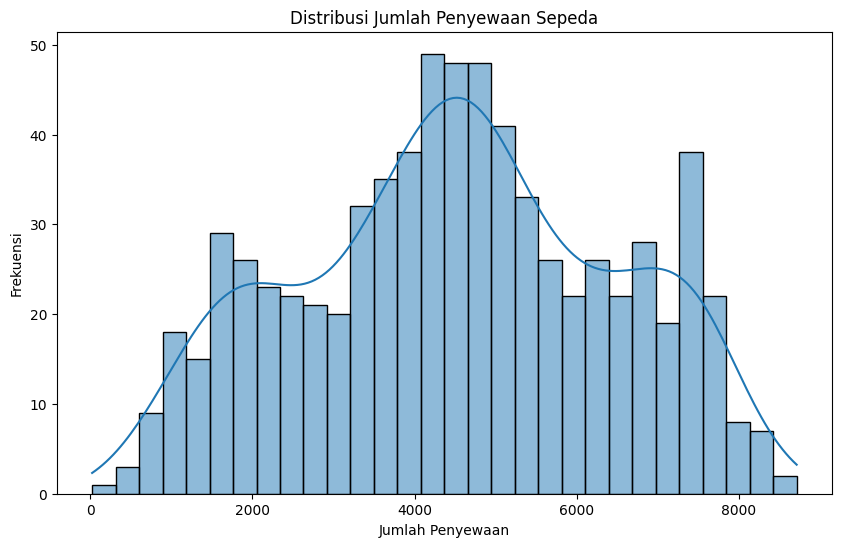

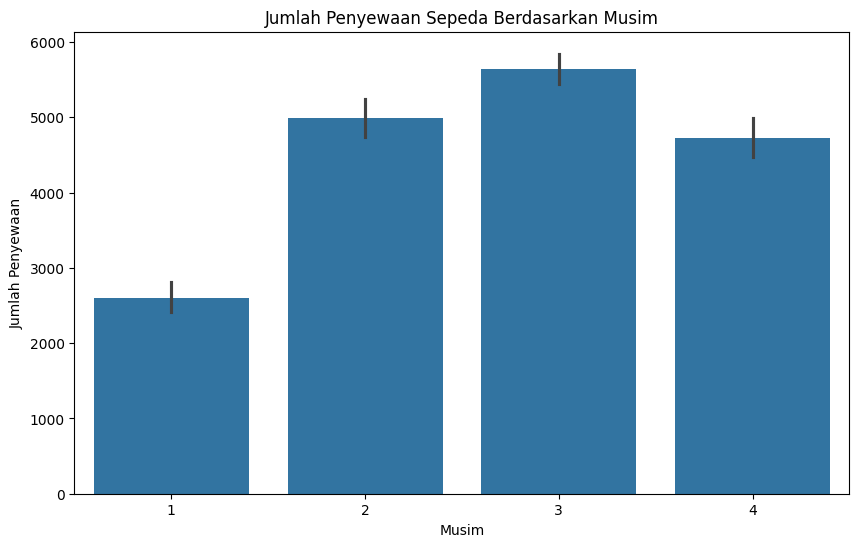

In [23]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=day_df)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Distribusi penyewaan sepeda menunjukkan pola miring ke kanan, artinya ada beberapa hari dengan jumlah penyewaan sangat tinggi.
- Musim panas dan gugur memiliki rata-rata penyewaan tertinggi dibandingkan musim lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

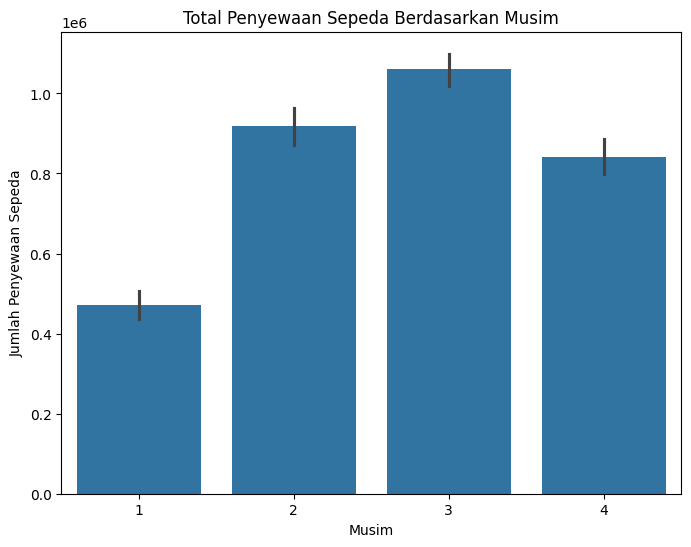

In [21]:
## Pertanyaan 1: Bagaimana distribusi jumlah penyewaan sepeda berdasarkan musim?
plt.figure(figsize=(8, 6))
sns.barplot(x=day_df['season'], y=day_df['cnt'], estimator=sum)
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim')
plt.show()

### Pertanyaan 2:

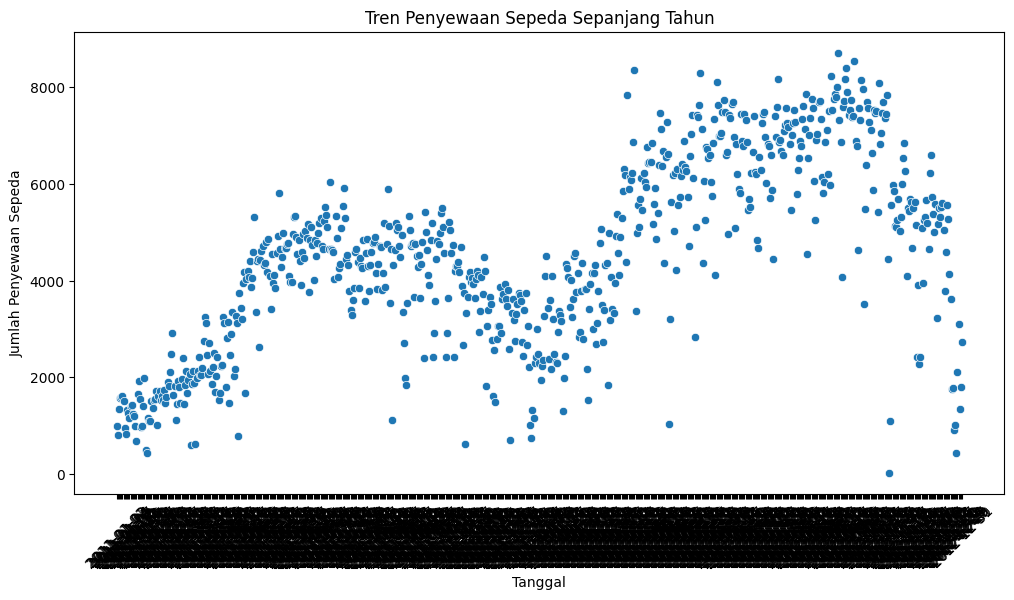

In [22]:
## Pertanyaan 2: Bagaimana tren jumlah penyewaan sepeda sepanjang tahun?
plt.figure(figsize=(12, 6))
sns.scatterplot(x=day_df['dteday'], y=day_df['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Tren Penyewaan Sepeda Sepanjang Tahun')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Musim panas memiliki jumlah penyewaan sepeda tertinggi dibandingkan musim lainnya.
- Tren penyewaan sepeda menunjukkan peningkatan secara bertahap sepanjang tahun, dengan beberapa fluktuasi pada bulan-bulan tertentu.

## Analisis Lanjutan (Opsional)

## Conclusion

- Dari analisis yang dilakukan, musim panas menunjukkan jumlah penyewaan sepeda tertinggi dibandingkan musim lainnya. Hal ini kemungkinan disebabkan oleh cuaca yang lebih mendukung untuk bersepeda, sehingga lebih banyak orang memilih untuk menggunakan sepeda sebagai sarana transportasi atau rekreasi. Sebaliknya, musim dingin memiliki jumlah penyewaan yang lebih rendah karena suhu yang lebih dingin dan kondisi jalan yang kurang mendukung.

- Tren penyewaan sepeda menunjukkan peningkatan yang signifikan sepanjang tahun, dengan puncak penyewaan terjadi pada bulan-bulan tertentu, terutama pada musim panas. Penurunan jumlah penyewaan terlihat pada musim dingin, yang kemungkinan besar disebabkan oleh faktor cuaca. Oleh karena itu, strategi pemasaran dan promosi dapat difokuskan pada musim dengan penyewaan rendah untuk meningkatkan penggunaan sepeda sepanjang tahun. Selain itu, pemerintah atau penyedia layanan dapat mempertimbangkan peningkatan fasilitas bersepeda agar tetap nyaman digunakan pada musim dengan penyewaan lebih rendah.